In [2]:
import os
import mne
from mne import cov
from mne.preprocessing import ICA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from mne.channels import make_dig_montage

from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs,corrmap

In [12]:
data_path = 'C:/Users/pkhan/Desktop/Kaiserslautern/Thesis/Data/AuditoryFif'
name = 'p02_4760_auditory.fif' 
raw = mne.io.read_raw_fif(os.path.join(data_path, name), preload=True)

print(raw)
print(raw.info)

Opening raw data file C:/Users/pkhan/Desktop/Kaiserslautern/Thesis/Data/AuditoryFif\p02_4760_auditory.fif...
    Range : 59328 ... 960989 =     59.328 ...   960.989 secs
Ready.


C:\Users\pkhan\AppData\Local\Temp\ipykernel_3344\1440599878.py:3: RuntimeWarning: This filename (C:/Users/pkhan/Desktop/Kaiserslautern/Thesis/Data/AuditoryFif\p02_4760_auditory.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(os.path.join(data_path, name), preload=True)


Reading 0 ... 901661  =      0.000 ...   901.661 secs...
<Raw | p02_4760_auditory.fif, 190 x 901662 (901.7 s), ~1.28 GB, data loaded>
<Info | 19 non-empty values
 acq_pars: ACQch001 11001 ACQch002 111002 ACQch003 111003 ACQch004 111004 ...
 bads: []
 ch_names: MEG 002, MEG 003, MEG 004, MEG 005, MEG 007, MEG 008, MEG 009, ...
 chs: 119 Gradiometers, 7 Stimulus, 64 EEG
 custom_ref_applied: False
 description: These data were measured with Neuromag-122
 dev_head_t: MEG device -> head transform
 dig: 86 items (3 Cardinal, 4 HPI, 79 Extra)
 events: 1 item (list)
 experimenter: eeg
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 330.0 Hz
 meas_date: 2024-10-31 13:12:02 UTC
 meas_id: 4 items (dict)
 nchan: 190
 proj_id: 1 item (ndarray)
 proj_name: andre
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 3 items (dict)
>


Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


C:\Users\pkhan\AppData\Local\Temp\ipykernel_3344\713096239.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
c:\Users\pkhan\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


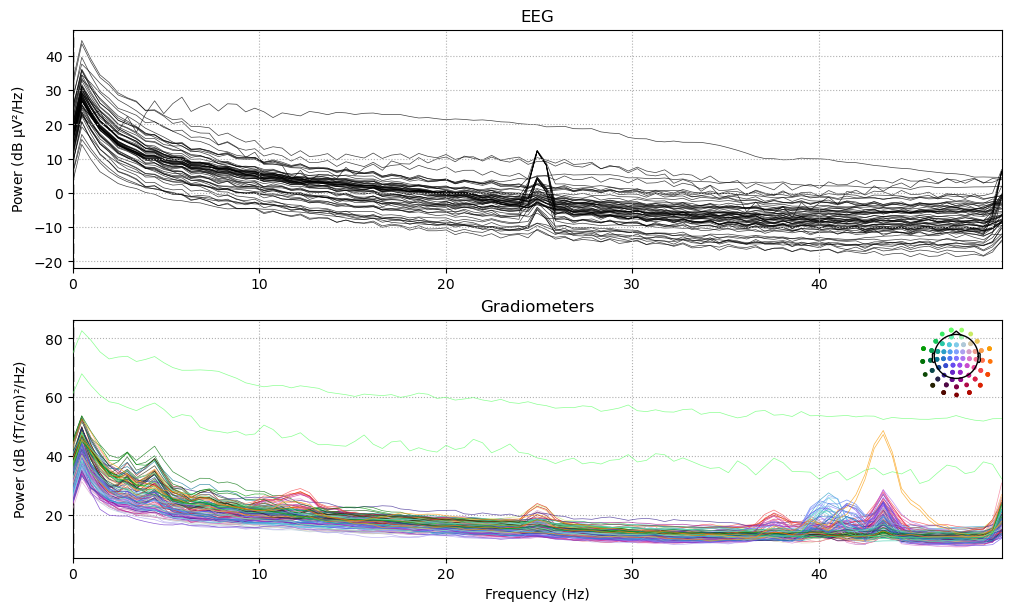

In [23]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw.plot()

In [ ]:
#RUN ONLY ONCE
#raw.rename_channels({"EEG 064": "ECG"})  
# Change the name of a channel

<Raw | p02_4760_auditory.fif, 190 x 901662 (901.7 s), ~1.28 GB, data loaded>

151 events found on stim channel STI 001
Event IDs: [5]
91 events found on stim channel STI 002
Event IDs: [5]
1 event found on stim channel STI 003
Event IDs: [5]
152 events found on stim channel STI 004
Event IDs: [5]
18 events found on stim channel STI 005
Event IDs: [5]
103 events found on stim channel STI 006
Event IDs: [5]
unique ID's found:  [ 1  2  7  8 16 32 41 42 43]
[[115595      0      8]
 [115670      0      2]
 [116670      0      1]
 [117733      0     41]
 [122749      0      8]
 [123820      0      1]
 [124880      0     42]
 [136216      0      8]
 [137285      0      1]
 [138367      0     43]
 [143691      0     32]
 [143768      0      2]
 [144768      0      1]
 [145825      0     41]
 [151385      0      8]
 [152451      0      1]
 [153569      0     42]
 [163060      0      8]
 [164133      0      1]
 [165204      0     43]
 [171469      0     16]
 [171533      0      2]
 [172549      0      1]
 [173608      0     41]
 [178970      0      8]
 [180049      0     

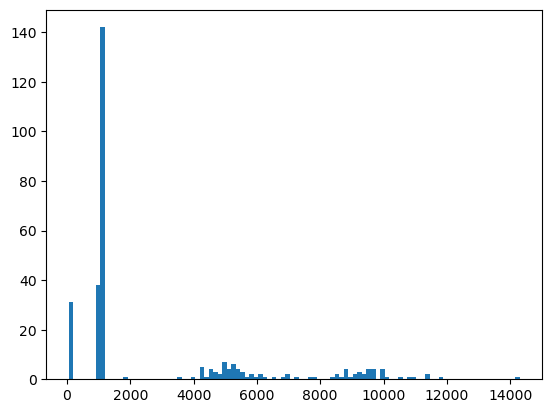

In [45]:
"""Checking trigger lines
17 Sept 2024
"""

from functools import reduce
from itertools import combinations

# %%
def find_6ch_binary_events(raw):
    adjust_timeline_by_msec = 0
    shortest_event = 0.001
    min_duration = 0.003

    # Binary Coding of 6 Stim Channels in Biomagenetism Lab Heidelberg
    # prepare arrays
    events = np.ndarray(shape=(0, 3), dtype=np.int32)
    evs = list()
    evs_tol = list()

    # Find events for each stim channel, append sample values to list
    evs.append(
        mne.find_events(
            raw,
            min_duration=min_duration,
            shortest_event=shortest_event,
            stim_channel=["STI 001"],
        )[:, 0]
    )
    evs.append(
        mne.find_events(
            raw,
            min_duration=min_duration,
            shortest_event=shortest_event,
            stim_channel=["STI 002"],
        )[:, 0]
    )
    evs.append(
        mne.find_events(
            raw,
            min_duration=min_duration,
            shortest_event=shortest_event,
            stim_channel=["STI 003"],
        )[:, 0]
    )
    evs.append(
        mne.find_events(
            raw,
            min_duration=min_duration,
            shortest_event=shortest_event,
            stim_channel=["STI 004"],
        )[:, 0]
    )
    evs.append(
        mne.find_events(
            raw,
            min_duration=min_duration,
            shortest_event=shortest_event,
            stim_channel=["STI 005"],
        )[:, 0]
    )
    evs.append(
        mne.find_events(
            raw,
            min_duration=min_duration,
            shortest_event=shortest_event,
            stim_channel=["STI 006"],
        )[:, 0]
    )

    for i in evs:
        # delete events in each channel,
        # which are too close too each other (1ms)
        too_close = np.where(np.diff(i) <= 1)
        if np.size(too_close) >= 1:
            print(
                f"Two close events (1ms) at samples "
                f"{i[too_close] + raw.first_samp}, first deleted"
            )
            i = np.delete(i, too_close, 0)
            evs[evs.index(i)] = i

        # add tolerance to each value
        i_tol = np.ndarray(shape=(0, 1), dtype=np.int32)
        for t in i:
            i_tol = np.append(i_tol, t - 1)
            i_tol = np.append(i_tol, t)
            i_tol = np.append(i_tol, t + 1)

        evs_tol.append(i_tol)

    # Get events from combinated Stim-Channels
    equals = reduce(
        np.intersect1d,
        (evs_tol[0], evs_tol[1], evs_tol[2], evs_tol[3], evs_tol[4], evs_tol[5]),
    )
    # elimnate duplicated events
    too_close = np.where(np.diff(equals) <= 1)
    if np.size(too_close) >= 1:
        equals = np.delete(equals, too_close, 0)
        equals -= 1  # correction, because of shift with deletion

    for q in equals:
        if (
            q not in events[:, 0]
            and q not in events[:, 0] + 1
            and q not in events[:, 0] - 1
        ):
            events = np.append(events, [[q, 0, 63]], axis=0)

    for a, b, c, d, e in combinations(range(6), 5):
        equals = reduce(
            np.intersect1d, (evs_tol[a], evs_tol[b], evs_tol[c], evs_tol[d], evs_tol[e])
        )
        too_close = np.where(np.diff(equals) <= 1)
        if np.size(too_close) >= 1:
            equals = np.delete(equals, too_close, 0)
            equals -= 1

        for q in equals:
            if (
                q not in events[:, 0]
                and q not in events[:, 0] + 1
                and q not in events[:, 0] - 1
            ):
                events = np.append(
                    events,
                    [[q, 0, int(2**a + 2**b + 2**c + 2**d + 2**e)]],
                    axis=0,
                )

    for a, b, c, d in combinations(range(6), 4):
        equals = reduce(
            np.intersect1d, (evs_tol[a], evs_tol[b], evs_tol[c], evs_tol[d])
        )
        too_close = np.where(np.diff(equals) <= 1)
        if np.size(too_close) >= 1:
            equals = np.delete(equals, too_close, 0)
            equals -= 1

        for q in equals:
            if (
                q not in events[:, 0]
                and q not in events[:, 0] + 1
                and q not in events[:, 0] - 1
            ):
                events = np.append(
                    events, [[q, 0, int(2**a + 2**b + 2**c + 2**d)]], axis=0
                )

    for a, b, c in combinations(range(6), 3):
        equals = reduce(np.intersect1d, (evs_tol[a], evs_tol[b], evs_tol[c]))
        too_close = np.where(np.diff(equals) <= 1)
        if np.size(too_close) >= 1:
            equals = np.delete(equals, too_close, 0)
            equals -= 1

        for q in equals:
            if (
                q not in events[:, 0]
                and q not in events[:, 0] + 1
                and q not in events[:, 0] - 1
            ):
                events = np.append(events, [[q, 0, int(2**a + 2**b + 2**c)]], axis=0)

    for a, b in combinations(range(6), 2):
        equals = np.intersect1d(evs_tol[a], evs_tol[b])
        too_close = np.where(np.diff(equals) <= 1)
        if np.size(too_close) >= 1:
            equals = np.delete(equals, too_close, 0)
            equals -= 1

        for q in equals:
            if (
                q not in events[:, 0]
                and q not in events[:, 0] + 1
                and q not in events[:, 0] - 1
            ):
                events = np.append(events, [[q, 0, int(2**a + 2**b)]], axis=0)

    # Get single-channel events
    for i in range(6):
        for e in evs[i]:
            if (
                e not in events[:, 0]
                and e not in events[:, 0] + 1
                and e not in events[:, 0] - 1
            ):
                events = np.append(events, [[e, 0, 2**i]], axis=0)

    # sort only along samples(column 0)
    events = events[events[:, 0].argsort()]

    # apply latency correction
    events[:, 0] = [
        ts + np.round(adjust_timeline_by_msec * 10**-3 * raw.info["sfreq"])
        for ts in events[:, 0]
    ]

    ids = np.unique(events[:, 2])
    print("unique ID's found: ", ids)
    return events


# %%
events = find_6ch_binary_events(raw)
print(events)
#%%
# compute the time between events
diffT = np.diff(events[:, 0])
#%%
# please plot a histogram of the time differences
import matplotlib.pyplot as plt
plt.hist(diffT, bins=100)
plt.show()


In [46]:
raw.plot(events=events, start=0, duration=10, n_channels=64)

Channels marked as bad:
['MEG 079', 'MEG 103', 'MEG 091', 'MEG 036', 'MEG 068', 'MEG 027']


In [50]:
# This is a dictionary to define the meaning of each event code
event_dict = {  
    "continue" :8,
    "fixation": 2,
    "photodiod": 1,
    "melody1": 41,
    "melody2": 42,
    "melody3": 43,
    "responseC": 16,
    "responseW": 32,
}

C:\Users\pkhan\AppData\Local\Temp\ipykernel_3344\1143104898.py:1: RuntimeWarning: event 7 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, raw.info["sfreq"], raw.first_samp, event_id=event_dict)


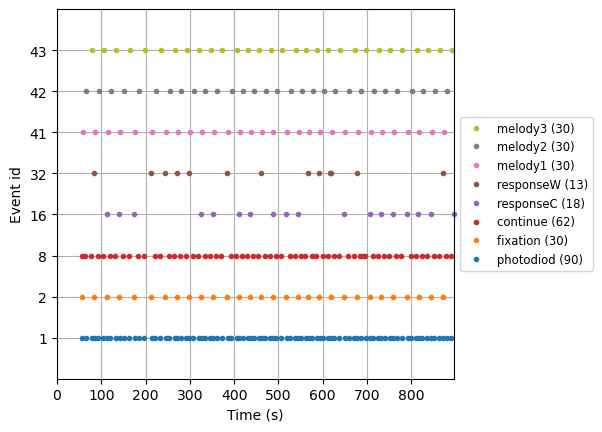

In [53]:
fig = mne.viz.plot_events(events, raw.info["sfreq"], raw.first_samp, event_id=event_dict)

In [59]:
raw.plot(
    events=events,
    start=0,
    duration=10,
    event_color={8: "red", 2: "orange", 1: "blue", 41: "gray", 42: "purple", 43: "green", 16: "pink", 32: "yellow", 7: "black"},
    event_id=event_dict,
)


Channels marked as bad:
['MEG 079', 'MEG 103', 'MEG 091', 'MEG 036', 'MEG 068', 'MEG 027']
Channels marked as bad:
['MEG 079', 'MEG 103', 'MEG 091', 'MEG 036', 'MEG 068', 'MEG 027']
